# Assignment 8

In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data.shape)

(506, 13)


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['MEDV'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [11]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

###### From get-go, two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

###### Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of 50,000 dollars). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.

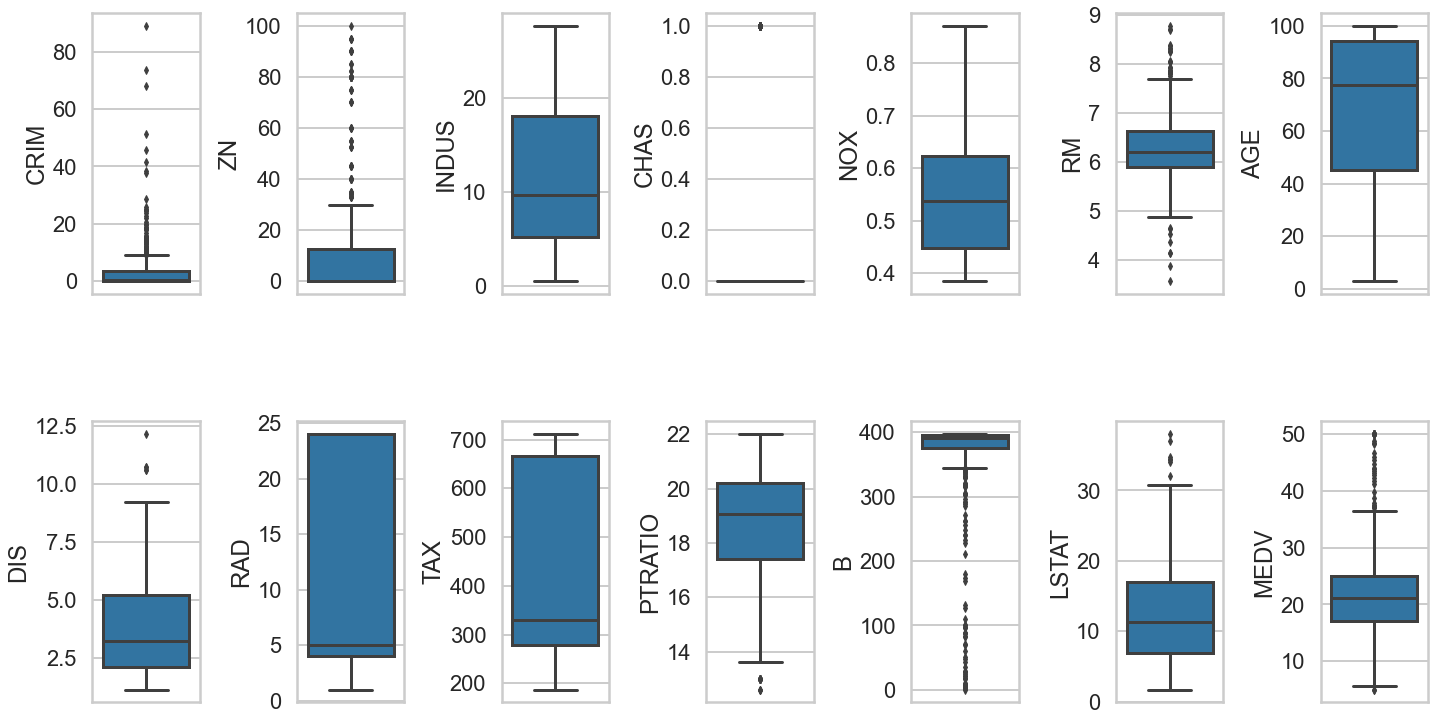

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in bos.items():
    sns.boxplot(y=k, data=bos, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

###### Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [13]:
for k, v in bos.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(bos)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


###### Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [14]:
bos = bos[~(bos['MEDV'] >= 50.0)]
print(np.shape(bos))

(490, 14)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

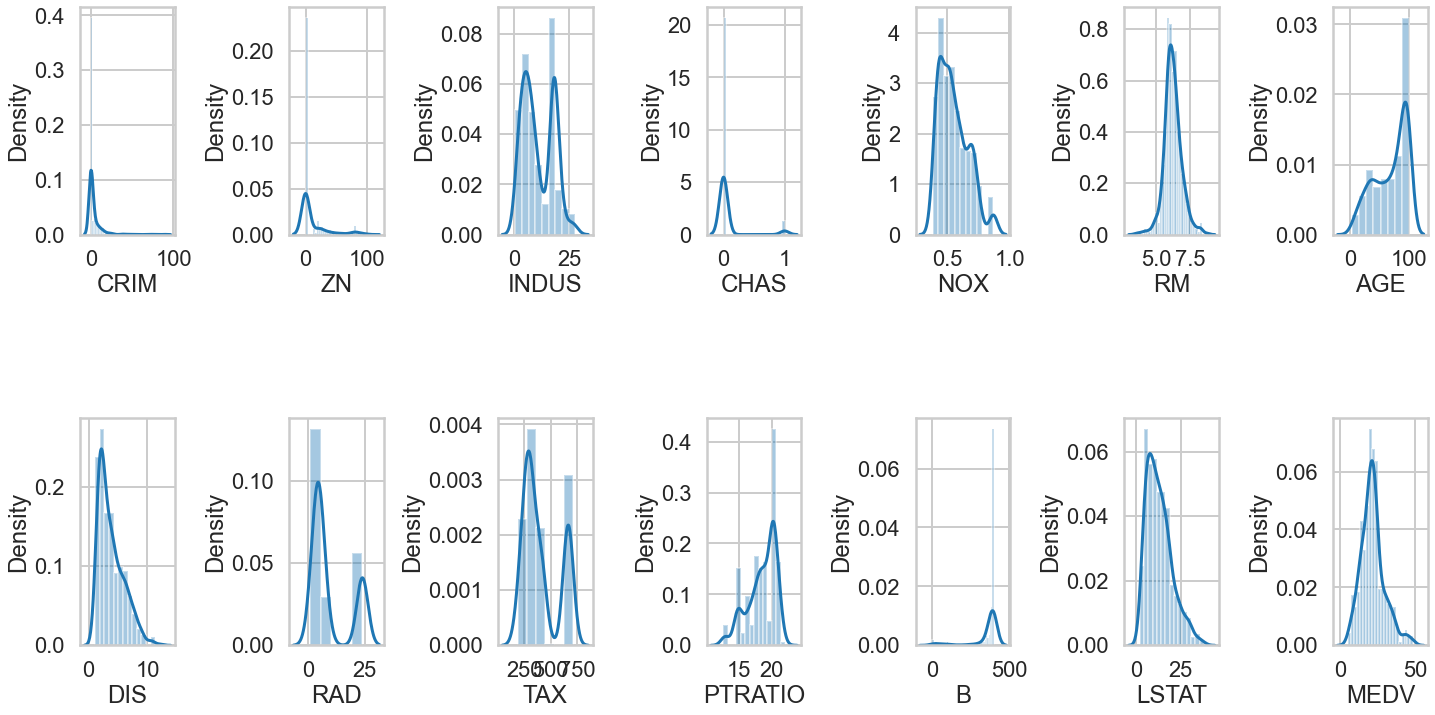

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in bos.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

###### The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have normal or bimodel ditribution of data except CHAS (which is a discrete variable). Now let's plot the pairwise correlation on data.

<AxesSubplot:>

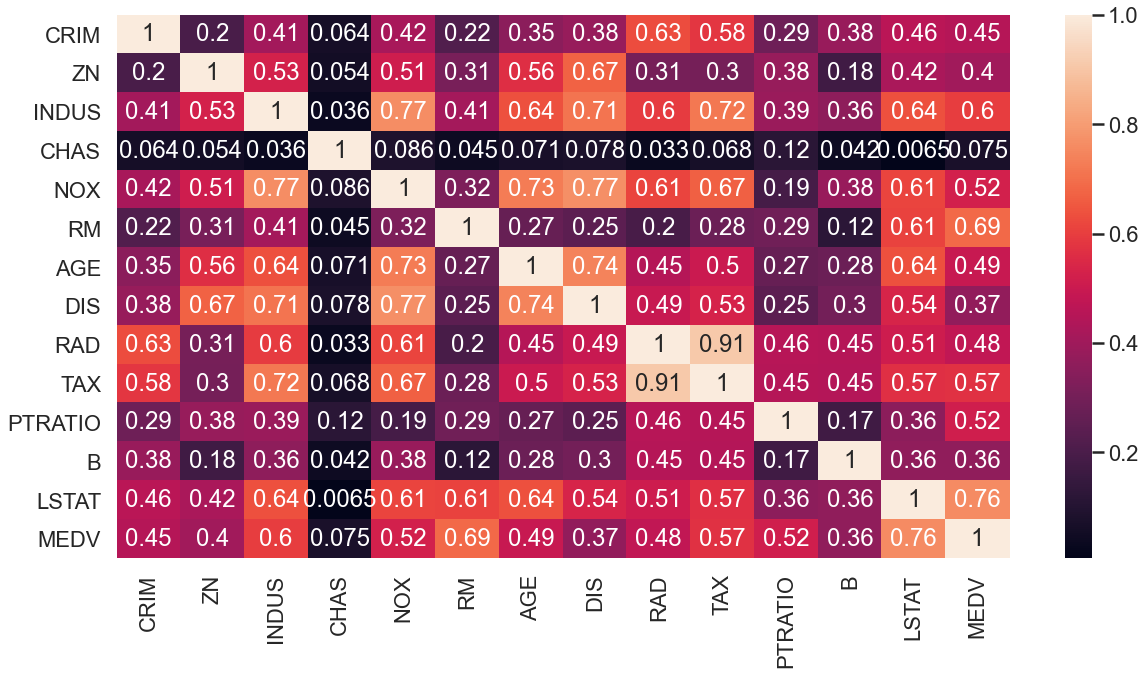

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(bos.corr().abs(),  annot=True)

###### From correlation matrix, we see TAX and RAD are highly correlated features. The columns ZN, NOX, AGE, TAX, DIS, LSTAT, RAD, MEDV has a correlation score above 0.5 with INDUS which is a good indication of using as predictors. Let's plot these columns against INDUS.

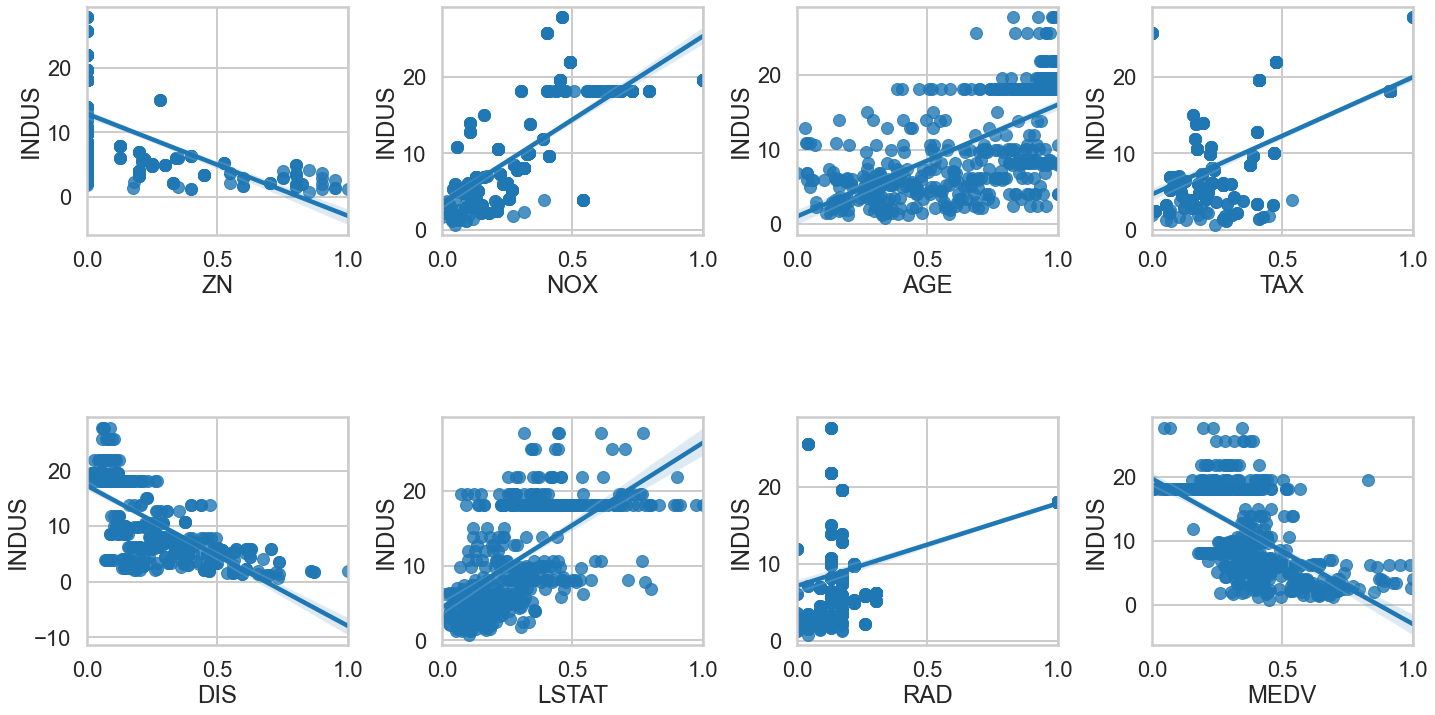

In [17]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['ZN', 'NOX', 'AGE', 'TAX','DIS', 'LSTAT', 'RAD', 'MEDV']
x = bos.loc[:,column_sels]
y = bos['INDUS']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

###### From correlation matrix, we see that the columns ZN, INDUS, NOX, AGE, TAX, LSTAT, RAD, CRIM has a good correlation score with DIS which is a good indication of using as predictors. Let's plot these columns against DIS.

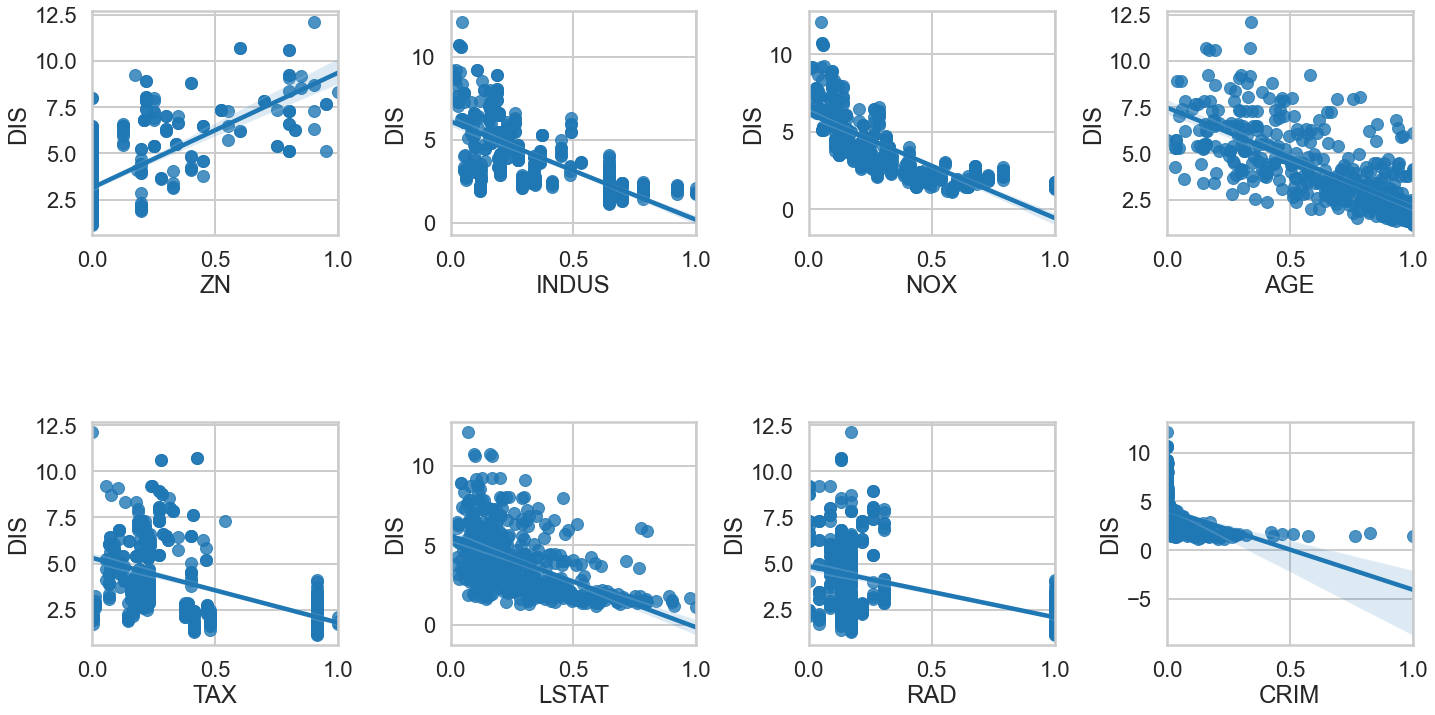

In [18]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['ZN', 'INDUS', 'NOX', 'AGE', 'TAX','LSTAT', 'RAD', 'CRIM']
x = bos.loc[:,column_sels]
y = bos['DIS']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [19]:
# Creating instance of various ML regressors in Scikit-Learn
linreg = LinearRegression()
lasso = Lasso()
rdgreg = Ridge()
dtreg = DecisionTreeRegressor()
rfreg = RandomForestRegressor()
krreg = KernelRidge()
baggingreg = BaggingRegressor()
gradboostreg = GradientBoostingRegressor()
svreg = SVR(kernel='linear')
elasticreg = ElasticNet()

# Predicting INDUS from other features using the sklearn regression models

###### Among the above mentioned attributes, NOX, DIS, and TAX have a high correlation (>0.7) with INDUS. Therefore, using these 3 attributes, we'll predict INDUS

In [20]:
meansquareerrors = []
regressors = [linreg, lasso, rdgreg, elasticreg, baggingreg, dtreg, rfreg, svreg, krreg, gradboostreg]
regressor_names = ["Linear", "Lasso", "Ridge", "Elastic Net", "Bagging", "Decision Tree", "Random Forest",\
                   "SVR", "Kernel Ridge","Gradient Boost"]
for regressor,regressor_name in zip(regressors,regressor_names):
    reg = regressor
    Y = bos['INDUS']
    X = bos.drop(['CRIM', 'INDUS', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B', 'MEDV', 'ZN', 'AGE', 'LSTAT'],axis=1)
    X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    X_train, X_val, Y_train, Y_val  = train_test_split(X_train1, Y_train1, test_size=0.2, random_state=1)
    print(str(regressor_name) +' Regression')

    reg.fit(X_train,Y_train)
    print("Score for Testing :  ")
    print(reg.score(X_test,Y_test))
    
    print("\nScore for validation : ")
    print(reg.score(X_val,Y_val))
    
    y_test_predict = reg.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("\nThe model performance for testing set")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    y_train_predict = reg.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    print("\nThe model performance for training set")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")
    
    mse = mean_squared_error(Y_test, y_test_predict)
    meansquareerrors.append(mse)
    print("Mean Square Error : ", mse)
    print('\n')
    print('====================================')
    print('\n\n')


Linear Regression
Score for Testing :  
0.7703484556289559

Score for validation : 
0.7049640712871976

The model performance for testing set
RMSE is 3.149205590441415
R2 score is 0.7703484556289559

The model performance for training set
RMSE is 3.9691214876612495
R2 score is 0.6689782239713786


Mean Square Error :  9.917495850867462





Lasso Regression
Score for Testing :  
0.762008177763525

Score for validation : 
0.6667769507846768

The model performance for testing set
RMSE is 3.205880616806156
R2 score is 0.762008177763525

The model performance for training set
RMSE is 4.180066747176002
R2 score is 0.6328578781281757


Mean Square Error :  10.277670529213419





Ridge Regression
Score for Testing :  
0.7711455457855821

Score for validation : 
0.6904615299822354

The model performance for testing set
RMSE is 3.1437356017325713
R2 score is 0.7711455457855821

The model performance for training set
RMSE is 4.000813070725658
R2 score is 0.6636710115651536


Mean Square Error :

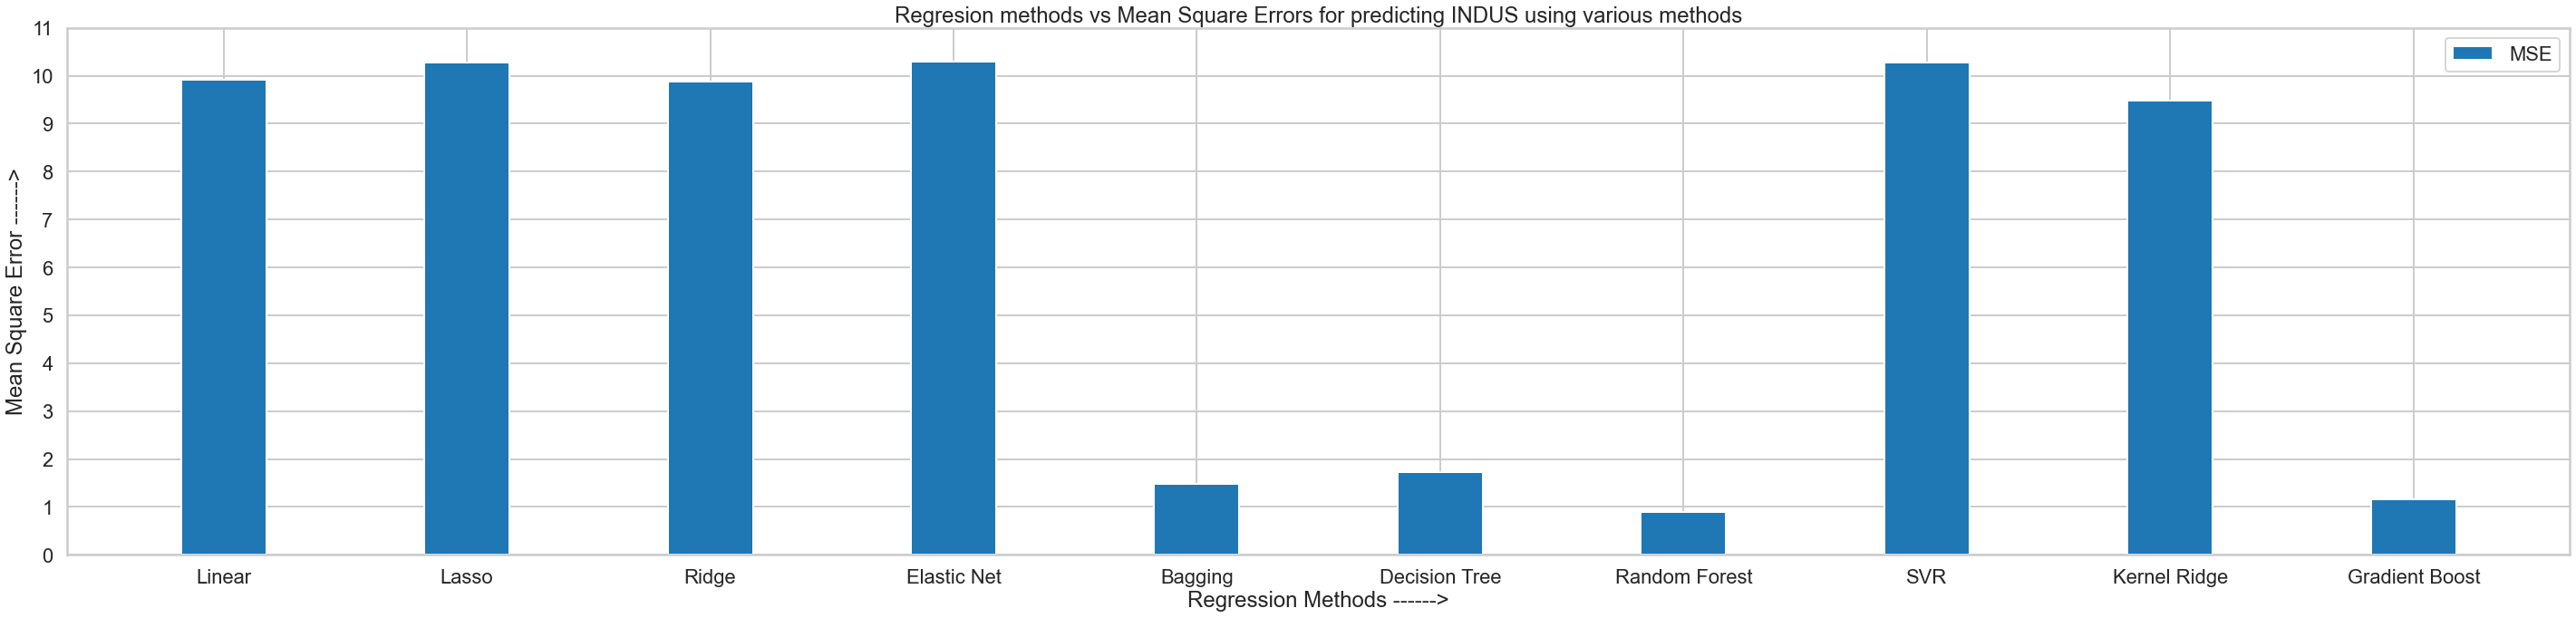

In [21]:
x = np.arange(len(regressor_names))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(40, 10))

rects1 = ax.bar(x, meansquareerrors, width, label='MSE')
ax.set_ylabel('Mean Square Error ------>')
ax.set_xlabel('Regression Methods ------>')
ax.set_title('Regresion methods vs Mean Square Errors for predicting INDUS using various methods')
ax.set_xticks(x)
ax.set_xticklabels(regressor_names)
ax.legend()

plt.yticks(np.arange(12, step=1))
fig.tight_layout()

plt.show()

## As we can see from above bar graph, the best performing regressors are the ensemble regressors, here, Bagging, Decision Tree, Random Forest, and Gradient Boosting. All other non-ensemble gave almost the same mean square error (MSE). In our case, Elastic Net Regressor and Support Vecor Regressor have the highest mean-square errors i.e 10.29 and 10.27 respectively while Kernel ridge regressor has the lowest MSE among non-ensemble regressors i.e 9.49. The top 2 best performing regressors among all the ensemble regressors are Random Forest and Gradient Boost with the mean square error of 0.9 and 1.16 respectively.

# Predicting DIS from other features using the sklearn regression models

###### Among the above mentioned attributes, INDUS, NOX, and AGE have a high correlation (>0.7) with DIS. Therefore, using these 3 attributes, we'll predict DIS

In [22]:
meansquareerrors = []
regressors = [linreg, lasso, rdgreg, elasticreg, baggingreg, dtreg, rfreg, svreg, krreg, gradboostreg]
regressor_names = ["Linear", "Lasso", "Ridge", "Elastic Net", "Bagging", "Decision Tree", "Random Forest",\
                   "SVR", "Kernel Ridge","Gradient Boost"]
for regressor,regressor_name in zip(regressors,regressor_names):
    reg = regressor
    Y = bos['DIS']
    X = bos.drop(['CRIM', 'DIS', 'CHAS', 'RM', 'RAD', 'PTRATIO', 'B', 'MEDV', 'ZN', 'TAX', 'LSTAT'],axis=1)
    X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    X_train, X_val, Y_train, Y_val  = train_test_split(X_train1, Y_train1, test_size=0.2, random_state=1)
    print(str(regressor_name) +' Regression')

    reg.fit(X_train,Y_train)
    print("Score for Testing :  ")
    print(reg.score(X_test,Y_test))
    
    print("\nScore for validation : ")
    print(reg.score(X_val,Y_val))
    
    y_test_predict = reg.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("\nThe model performance for testing set")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    y_train_predict = reg.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    print("\nThe model performance for training set")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")
    
    mse = mean_squared_error(Y_test, y_test_predict)
    meansquareerrors.append(mse)
    print("Mean Square Error : ", mse)
    print('\n')
    print('====================================')
    print('\n\n')


Linear Regression
Score for Testing :  
0.6880427483326075

Score for validation : 
0.6288655315542779

The model performance for testing set
RMSE is 1.2315486298520184
R2 score is 0.6880427483326075

The model performance for training set
RMSE is 1.1066781160721852
R2 score is 0.6920853734430553


Mean Square Error :  1.5167120276903838





Lasso Regression
Score for Testing :  
0.644707295527484

Score for validation : 
0.5777518890730631

The model performance for testing set
RMSE is 1.3143080488334598
R2 score is 0.644707295527484

The model performance for training set
RMSE is 1.190366752502657
R2 score is 0.6437546111289001


Mean Square Error :  1.7274056472284163





Ridge Regression
Score for Testing :  
0.683265310549959

Score for validation : 
0.621635084597806

The model performance for testing set
RMSE is 1.2409430126538668
R2 score is 0.683265310549959

The model performance for training set
RMSE is 1.1192524395134034
R2 score is 0.6850484323844929


Mean Square Error 

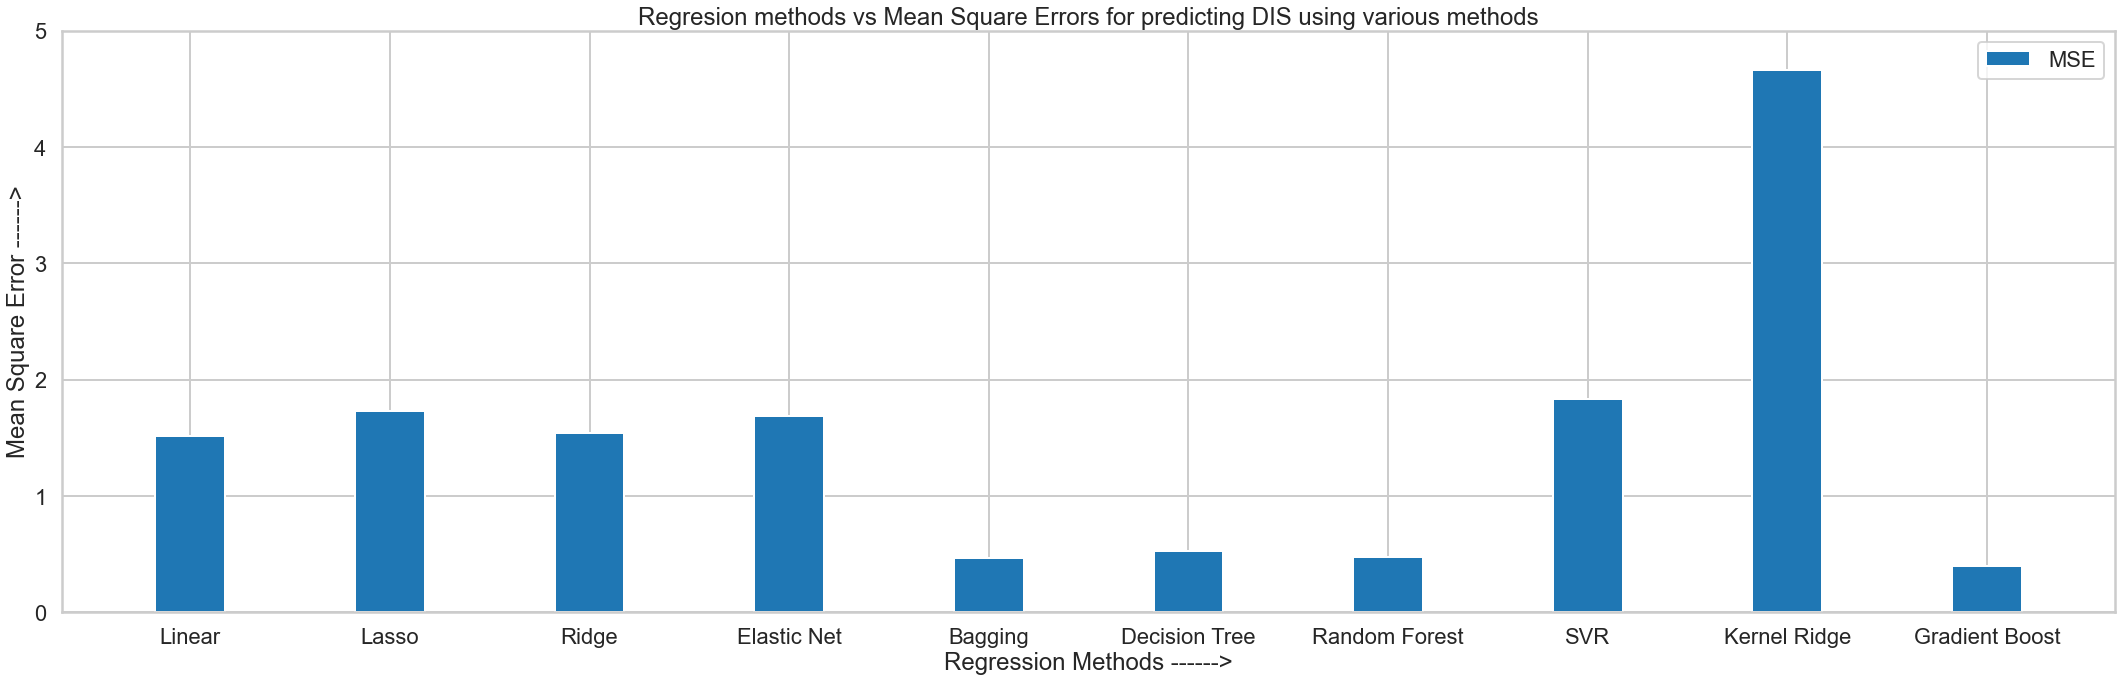

In [23]:
x = np.arange(len(regressor_names))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(30, 10))
rects1 = ax.bar(x, meansquareerrors, width, label='MSE')
ax.set_ylabel('Mean Square Error ------>')
ax.set_xlabel('Regression Methods ------>')
ax.set_title('Regresion methods vs Mean Square Errors for predicting DIS using various methods')
ax.set_xticks(x)
ax.set_xticklabels(regressor_names)
ax.legend()

plt.yticks(np.arange(6, step=1))
fig.tight_layout()

plt.show()

## As we can see from above bar graph, the Kernel Ridge Regressor (KRR) performed the worst. The mean square error (MSE) in case of KRR is almost 2.5 times the second worst performing regressor i.e. Support Vector Regressor (SVR). The mean square error in case of Kernel Ridge Regressor is 4.66 while the second worst performing method Support Vector Regression gave a mean square error of 1.84. Among non-ensemble regressors, the MSE of all the regressors is almost similar being Linear regressor with the lowest MSE of 1.52. The top 2 best performing regressors among all the ensemble regressors are Gradient Boost and Bagging with the mean square error of 0.39 and 0.46 respectively.